In [1]:
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
%matplotlib inline
import math
from matplotlib import style
import inspect
from IPython.display import display, clear_output

style.use('ggplot')
style.use('seaborn-ticks')

`Fibonacci_search().fit()` - расчет алгоритма (нужно запустить после создания экземпляра класса)  
`Fibonacci_search().data()` - таблица с пошаговыми расчетами  
`Fibonacci_search().rep()` - ответ  
`Fibonacci_search().vis()` - график функции с точкой минимума  
`Fibonacci_search().vis_steps()` - пошаговая визуализация  

In [2]:
def f(x):
    return x**4 + 4*(x**3) + 7*(x**2) + 2*x + 1

def fib(n, cache = {0: 0, 1: 1}):
    if n not in cache:
        cache[n] = fib(n-1, cache) + fib(n-2, cache)
    return cache[n]

In [3]:
class Fibonacci_search:
    def __init__(self, f, a, b, e):
        raw_f = inspect.getsource(f)
        self.func = raw_f[raw_f.find('return') + 6:].strip()
        self.a, self.b, self.e = a, b, e
        self.prec = len(str(self.e).split('.')[1])
        
        n = 1
        while (b-a)/e > fib(n):
            n += 1
        self.n = n
        
    def f(self, x):
        return f(x)
    
    def fit(self):
        a, b, e, n = self.a, self.b, self.e, self.n
        prec = self.prec
        la = a + (fib(n-2)/fib(n))*(b-a)
        mu = a +(fib(n-1)/fib(n))*(b-a)
        k = 1
        data = {0:[a, b, la, f(la), mu, f(mu)]}
        
        while k != n-2:
            if f(la) > f(mu):
                a = la
                la = mu
                mu = a + (fib(n-k-1)/fib(n-k))*(b-a)
            else:
                b = mu
                mu = la
                la = a + (fib(n-k-2)/fib(n-k))*(b-a)
            data[k] = [a, b, la, f(la), mu, f(mu)]
            k += 1
            
        mu = la + e
        if f(la) < f(mu):
            b = mu
        else:
            a = la
        
        x_min = round((a+b)/2, prec)
        res = [x_min, round(f(x_min), prec)]
        
        cache = pd.DataFrame(data).T
        cache.columns = ['a', 'b', 'la', 'f(la)', 'mu', 'f(mu)']
        
        self.data = cache
        self.res = res
        
    def rep(self):
        return print(f'Минимум функции f(x) = {self.func}, равный {round(self.res[1], self.prec)}  достигается при x = {round(self.res[0], self.prec)} с точностью e = {self.e} на шаге {len(self.data)}') 

    def vis(self):
        df, opt = self.data, self.res
        f, a, b = self.f, self.a, self.b
        prec = self.prec
        plt_x = np.linspace(a, b, round((b-a)*250))
        plt_data = np.array([plt_x, [f(x) for x in plt_x]])
        fig, ax = plt.subplots(figsize = (16, 9))
        ax.plot(plt_data[0], plt_data[1], label = f'f(x) = {self.func}')
        ax.scatter(opt[0], opt[1], c ='red', label = f'f(x*) = {round(opt[1], prec)}')
        ax.legend( prop={'size': 14})
        ax.grid()
        return(ax)    
    
    def vis_steps(self):
        df, opt = self.data, self.res
        f, a, b = self.f, self.a, self.b
        prec = self.prec
        
        plt_x = np.linspace(a, b, round((b-a)*250))
        plt_data = np.array([plt_x, [f(x) for x in plt_x]])
        fig, ax = plt.subplots(figsize = (16, 9))   
        
        for i in range(5):
            display(fig)
            ax.cla()
            clear_output(wait = True)
            plt.pause(0.5)
        
        for i in range(len(df)):
            if i % 7 == 0 and i != 0:
                a,b = x1 - a / 8 * x1, x2 + b / 8
            ax.set_xlim(a-a/5, b+b/5)
            
            x1 = df['la'][i]
            y1 = df['f(la)'][i]
            
            x2 = df['mu'][i]
            y2 = df['f(mu)'][i]
            
            ax.scatter(x1, y1, c = 'white', label = f'step = {i + 1}')
            
            ax.axvline(df['a'][i], c = 'blue', label = f'a = {round(df["a"][i], prec)}')
            ax.axvline(df['b'][i], c = 'orange', label = f'b = {round(df["b"][i], prec)}')
            
            ax.scatter(x1, y1, marker = 'x', c = 'black', label = f'f(la) = {round(y1, prec)}')
            
            ax.plot(plt_data[0], plt_data[1])
            ax.scatter(x2, y2, marker = 'x', c = 'red', label = f'f(mu) = {round(y2, prec)}')
            
            if i == len(df) - 1:
                ax.scatter(opt[0], opt[1], c = 'red', marker = '|', label = f'f(x*) = {round(opt[1], prec)}')
                       
            ax.legend( prop={'size': 14})
            ax.grid()
            display(fig)
            
            ax.cla()

            clear_output(wait = True)
            plt.pause(0.5)
    

In [4]:
task1 = Fibonacci_search(f, -3, 2, 0.0001)
task1.fit()
task1.rep()

Минимум функции f(x) = x**4 + 4*(x**3) + 7*(x**2) + 2*x + 1, равный 0.8433  достигается при x = -0.1649 с точностью e = 0.0001 на шаге 23


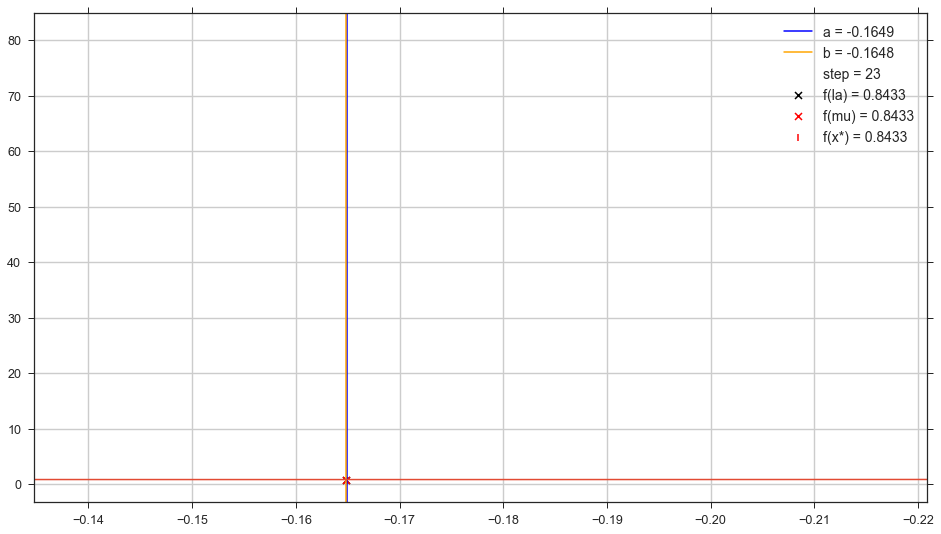

In [54]:
task1.vis_steps()

In [55]:
task1.data

,a,b,la,f(la),mu,f(mu)
0,-3.000000,2.000000,-1.090170,3.368876,0.090170,1.240253
1,-1.090170,2.000000,0.090170,1.240253,0.819660,9.996322
2,-1.090170,0.819660,-0.360680,1.018510,0.090170,1.240253
3,-1.090170,0.090170,-0.639320,1.704294,-0.360680,1.018510
4,-0.639320,0.090170,-0.360680,1.018510,-0.188471,0.846190
5,-0.360680,0.090170,-0.188471,0.846190,-0.082039,0.880871
6,-0.360680,-0.082039,-0.254249,0.882437,-0.188471,0.846190
7,-0.254249,-0.082039,-0.188471,0.846190,-0.147817,0.844873
8,-0.188471,-0.082039,-0.147817,0.844873,-0.122692,0.852828
9,-0.188471,-0.122692,-0.163346,0.843360,-0.147817,0.844873


<AxesSubplot:>

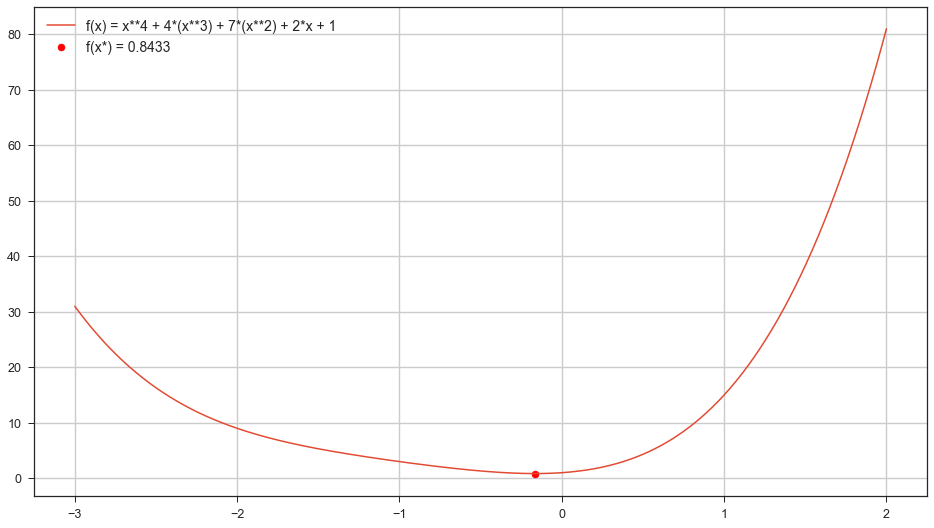

In [56]:
task1.vis()